### **Objetivos**

Realizar uma pequena análise exploratória de dados (EDA) para entender mais sobre o dataset.

**ATENÇÃO**: Os resultados dessa análise podem ser melhor observados utilizando a plataforma [Streamlit](https://thiagopastre-portfolio-yelp-projectsourcesstreamlit-c4t962.streamlit.app/), pois alguns deles foram criados </br> utilizando a biblioteca Plotly e não serão exibidos corretamente no Github.

#### 1. Importando as bibliotecas 

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### 2. Realizando a leitura do arquivo "business_EDITED.pkl" e criando o dataset

O arquivo "business_EDITED" foi gerado na [etapa anterior](./2_Business_DATA_PROCESSING.ipynb)

In [54]:
# Criando o dataset e exibindo uma amostra do mesmo

# Definindo uma variável com o caminho para os arquivos JSON
path = os.path.abspath('..') + '\\INPUT'

# Realizando a leitura do arquivo "business_EDITED.csv" e criando o dataset
business = pd.read_pickle(path + '\\business_EDITED.pkl')

# Exibindo as primeiras linhas do dataset para confirmar se o arquivo foi lido corretamente
business.head(3)

,city,state,stars,review_count,is_open,category_Acupuncture,category_Doctors,category_Health&Medical,category_Naturopathic/Holistic,category_Nutritionists,...,hours_None,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday,le_city,le_state
0,Santa Barbara,CA,5.0,7,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,1007,2
1,Affton,MO,3.0,15,1,0,0,0,0,0,...,0,1,1192,1177,1234,1296,1171,0,6,13
2,Tucson,AZ,3.5,22,0,0,0,0,0,0,...,0,1115,1205,1191,1249,1315,1205,1111,1210,1


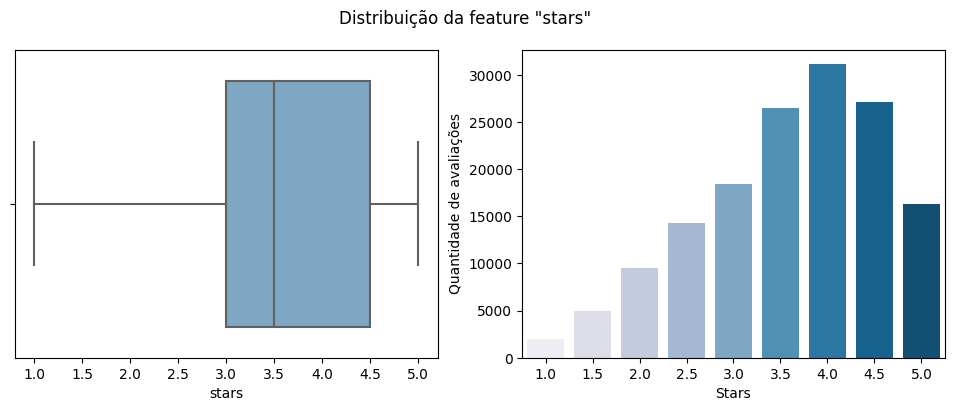

In [55]:
# Verificando a distribuição da feature 'stars' (que será o target do nosso futuro modelo)

stars = business['stars'].agg('value_counts')

fig, ax = plt.subplots(1,2, figsize=[12,4])

sns.boxplot(ax=ax[0],
            data=business,
            x='stars',
            palette='PuBu'
           )

sns.barplot(ax=ax[1],
            x=stars.index,
            y=stars,
            palette='PuBu'
           )

fig.suptitle('Distribuição da feature "stars"')
ax[1].set_xlabel('Stars')
ax[1].set_ylabel('Quantidade de avaliações')
plt.show()

Observa-se que 50% dos negócios cadastrados estão qualificados com no máximo 3.5 estrelas, sendo que a grande maioria deles está abaixo de 3 estrelas.

Temos penas 25% dos negócios atingindo a pontuação máxima.

In [56]:
# Criando um Dataframe contendo a quantidade TOTAL de negócios (abertos e fechados) agrupados por Estado

df_total_business = business[['state','is_open']].groupby('state').sum()
df_total_business['total'] = business[['state','is_open']].groupby('state').count()
df_total_business = df_total_business.sort_values(by='total', ascending=False).reset_index()

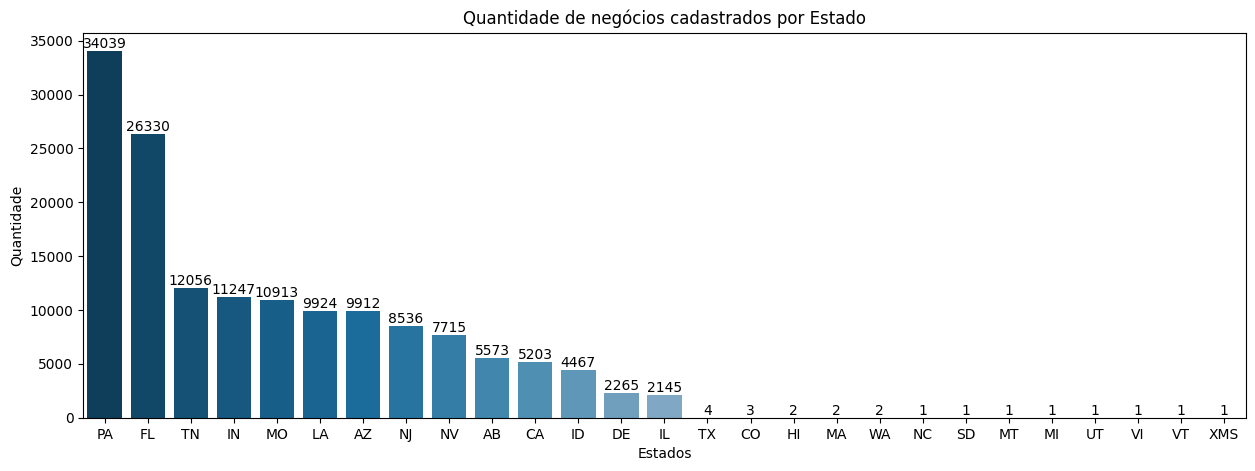

In [57]:
# Plotando o gráfico contendo os Estados que possuem a maior quantidade de negócios cadastrados

fig, ax = plt.subplots(figsize=[15,5])

ax = sns.barplot(x=df_total_business['state'],
                 y=df_total_business['total'],
                 palette='PuBu_r',
                 order=df_total_business['state']
                )
for i in ax.containers:
    ax.bar_label(i,)

ax.set(xlabel='Estados',
       ylabel='Quantidade',
       title='Quantidade de negócios cadastrados por Estado'
      )
plt.show()

Observei siglas "diferentes" (que não fazem parte dos EUA) como AB e XMS e resolvi investigar.

XMS faz referência à Liverpool (Reino Unido) enquanto AB aparentemente se refere à Alberta (Canadá).

Porém investigando ainda mais nota-se diversas cidades estranhas que não pertencem ao Canadá (erros de preenchimento?).

In [58]:
pd.Series(business[business['state']=='AB']['city'].unique())

0                          Edmonton
1                         St Albert
2                     Sherwood Park
3                        St. Albert
4                          Beaumont
5                      Saint Albert
6                       NW Edmonton
7                     Staint Albert
8                      Spruce Grove
9                     West Edmonton
10               Southeast Edmonton
11                         EdMonton
12                     Eaux Claires
13    Pilot Sound Area West Portion
14                   Sturgeon Couny
15                    East Edmonton
16                            Enoch
17                   Old Strathcona
18                         Sherwood
19          Alberta Park Industrial
20                      AB Edmonton
21                Fort Saskatchewan
22             Edmonton City Centre
23                         Downtown
dtype: category
Categories (1416, object): ['AB Edmonton', 'AMBLER', 'ARDMORE', 'AVON', ..., 'wimauma', '​Clayton', '​Largo', '​Lithia']

> Como não possuo acesso à equipe de negócios para identificar o motivo das inconsistências resolvi seguir o projeto e plotar um gráfico diferente apenas com os estados presentes nos EUA (consequentemente irei excluir desse gráfico os estados AB e XMS)

In [59]:
# Plotando o gráfico contendo os Estados que possuem a maior quantidade de negócios cadastrados de outra maneira (apenas USA)

fig = px.choropleth(df_total_business,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='total',
                    color_continuous_scale="turbo"
                    )


fig.update_layout(title_text = 'Quantidade de negócios cadastrados por Estado (USA)',
                  title_font_size = 22,
                  title_x=0.5, 
                  )

fig.show()

[Visualizar gráfico acima no Streamlit](https://thiagopastre-portfolio-yelp-projectsourcesstreamlit-c4t962.streamlit.app/)

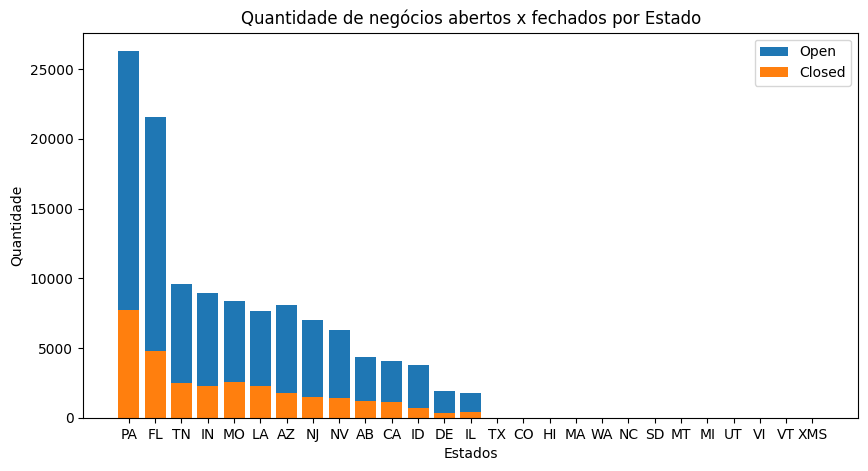

In [60]:
# Plotando o gráfico com a diferença entre negócios abertos x fechados por Estado

fig, ax = plt.subplots(figsize=[10,5])

plt.bar(x=df_total_business['state'], height=df_total_business['is_open'])
plt.bar(x=df_total_business['state'], height=(df_total_business['total'] - df_total_business['is_open']))

ax.set(xlabel='Estados',
       ylabel='Quantidade',
       title='Quantidade de negócios abertos x fechados por Estado'
      )
      
plt.legend(['Open','Closed'])
plt.show()

In [62]:
# Criando um Dataframe contendo as categorias e a quantidade de negócios presentes em cada uma delas (Todos os Estados)

cat_dict = {}

for feature in business:
    if 'category' in feature:
        new_feature = feature.replace('category_','')
        cat_dict[new_feature] = business[feature].sum()

df = pd.DataFrame.from_dict(cat_dict, orient='index').reset_index()
df = df.rename({'index':'categories', 0:'qty'}, axis=1)
df = df.sort_values(by='qty', ascending=False).reset_index(drop=True).head(10)


# Plotando o gráfico das categorias com mais negócios cadastrados (Top 10)

fig = px.bar(df, y='qty', x='categories', text_auto='.2s',
             labels={
                     "categories": "Categorias",
                     "qty": "Quantidade"
                     }
            )

fig.update_layout(title_text = 'Ranking das categorias com mais negócios cadastrados (TOP 10)',
                  title_font_size = 22,
                  title_x=0.5, 
                  )
fig.show()

[Visualizar gráfico acima no Streamlit](https://thiagopastre-portfolio-yelp-projectsourcesstreamlit-c4t962.streamlit.app/)

In [83]:
# Criando um Dataframe contendo as categorias e a quantidade de negócios presentes em cada uma delas para um ESTADO ESPECÍFICO
# Esse gráfico pode ser utilizado de forma interativa utilizando o link presente no início desse notebook para o Streamlit

opt = 'TX'

cat_dict2 = {}

business2 = business[business['state']==opt]

for feature in business2:
    if 'category' in feature:
        new_feature = feature.replace('category_','')
        cat_dict2[new_feature] = business2[feature].sum()

df2 = pd.DataFrame.from_dict(cat_dict2, orient='index').reset_index()
df2 = df2.rename({'index':'categories', 0:'qty'}, axis=1)
df2 = df2.sort_values(by='qty', ascending=False).reset_index(drop=True).head(10)


# Plotando o gráfico das categorias com mais negócios cadastrados no Estado selecionado

fig = px.bar(df2, y='qty', x='categories', text_auto='.2s',
             labels={
                     "categories": "Categorias",
                     "qty": "Quantidade"
                     }
            )

fig.update_layout(title_text = f"Categorias com mais negócios cadastrados no estado {opt} (TOP 10)",
                  title_font_size = 22,
                  title_x=0.5, 
                  )
fig.show()

[Visualizar gráfico acima no Streamlit](https://thiagopastre-portfolio-yelp-projectsourcesstreamlit-c4t962.streamlit.app/)